In [15]:
import pandas as pd
df = pd.read_csv('Dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
inputs = df.drop('target', axis='columns')  #Input section
target = df.target     # Target Column
inputs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [17]:
# Chech if any outlier
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [18]:
# Training tha data after splitting into 70:30
from sklearn.model_selection import train_test_split
from sklearn import tree

In [19]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size = 0.3)

In [20]:
len(x_train)

717

In [21]:
len(y_test)

308

In [22]:
model = tree.DecisionTreeClassifier()

In [23]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
#Accuracy
model.score(x_test, y_test)  #Testing data   

0.9805194805194806

In [25]:
model.score(x_train, y_train)   # Training data

1.0

In [26]:
# Prediction the disease of person who is at 3rd (index(2)) position in dataset
model.predict([[70,1,0,145,174,0,1,125,1,2.6,0,0,3]]) # prediction should pe zero (0)

array([0], dtype=int64)

In [27]:
import numpy as np

# Building the Predictive System

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)  #its target is 1 in dataset
#input_data = (70,1,0,145,174,0,1,125,1,2.6,0,0,3)  #its target is 0 in dataset
# Change the input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print("The Person does not have Heart Disease")
else:
    print("The Person has Heart Disease")

[1]
The Person has Heart Disease


In [28]:
y_pred = model.predict(x_test)
y_pretr = model.predict(x_train)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[140   3]
 [  3 162]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       143
           1       0.98      0.98      0.98       165

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



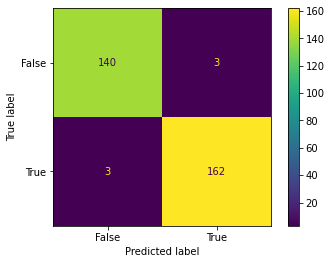

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
from sklearn import metrics

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)   # for testing data

#confusion_matrix = metrics.confusion_matrix(y_train, y_pretr)  # for training data

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
